# Opérations morphologiques sur les images

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2hsv
from skimage.morphology import (area_opening, erosion, dilation, closing, opening, area_closing) 
from skimage.draw import disk

## 1 - Définitions
 
 ### Opérations morphologique
 
 Elles permettent d'éffectuer des transformations sur la forme des images et plus précisement sur la forme des objets contenus dans les images. 
 
 
 #### Elément structurant
 
 - Les opérations morphologiques utilisent une matrice de pixels de petite taille appelée éléments structurant
 
 - L'élément structurant est utilisé pour parcourir tous les pixels de l'objet d'interêt dans l'image. 
 
 Ces pixels sont alors transformés et il en resulte une nouvelle image. 

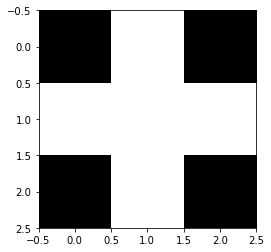

In [5]:
# Exemple d'élement structurant 

element = np.array([[0,1,0],
                    [1,1,1],
                    [0,1,0]])
plt.imshow(element,cmap='gray')

### Les modes d'action de l'élément structurant 

- Fit : Tous les pixels de l'élément structurant recouvrent les pixels d'objet
- Hit : Au moins un des pixels de l'élement structurant recouvre les pixels de l'objet
- Miss : Aucun des pixels de l'élement structurant ne recouvre les pixels de l'objet

### illustration

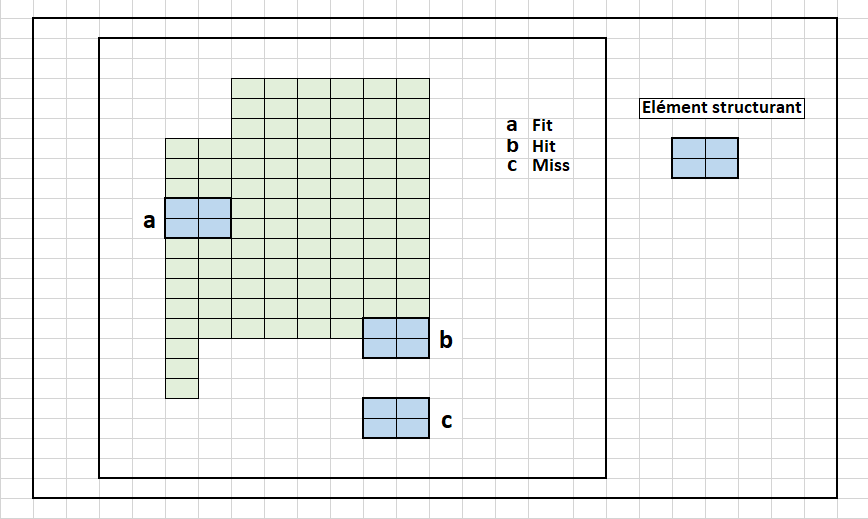

## 2 - Opérations morphologiques courantes : l'érosion et la dilatation

Les opérations morphologique les plus courantes sont l'érosion et la dialatation

### 2 - 1 L'érosion

- Elle supprime les éléments sans intèrêt de l'image en conservant les caractéristiques importants

- Elle supprime les pixels aux alentours de l'objet

- Pour éroder une image, nous promenons l'élement strcuturant sur l'objet d'intèrêt dans l'image. La valeur des pixels de sorte est calculée selon la règle suivante : pixel_de_sortie = 1 si Fit et pixel_de_sortie = 0 si non



### 2 - 2 La dilatation

- Elle agrandit les pixels de l'image et ajoute des pixels aux alentours de l'objet

- Elle rend l'objet plus visible

- Elle repart les cassures et les intrusions

- Pour dilater une image, nous promenons l'élement structurant sur l'onjet d'intèrêt dans l'image. La valeur des pixels est obtenue avec l'équation suivante : pixel_de_sortie = 1 si Hit et pixel_de_sortie = 0 si non 

### illustration

Soit l'image suivante constituée de 2 cercles adjancants : 

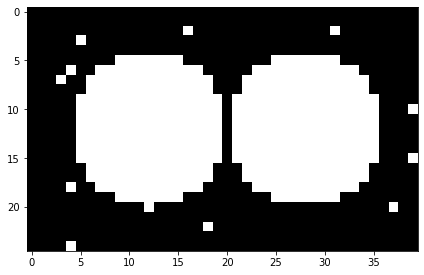

In [8]:
circle_image = np.zeros((25,40))
circle_image[disk((12,12),8)] = 1 
circle_image[disk((12,28),8)] = 1 
np.random.seed(2)
for x in range (20) : 
    circle_image[np.random.randint(25), np.random.randint(40)] = 1 
imshow(circle_image)

Text(0.5, 1.0, 'Image dilatée')

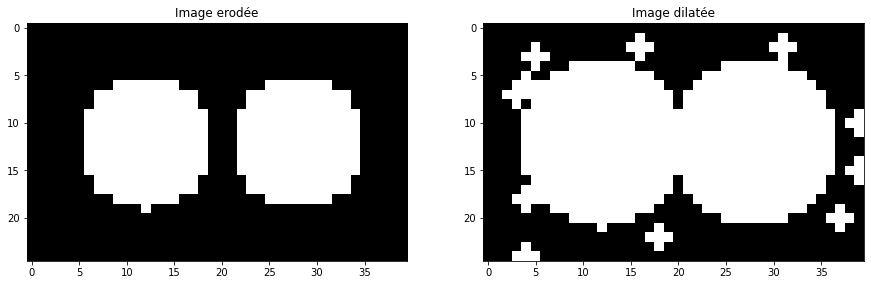

In [10]:
# Nous allons eroder, dillater et afficher l'image 

fig,ax = plt.subplots(1,2,figsize = (15,5))

ax[0].imshow(erosion(circle_image,element), cmap = 'gray')

ax[0].set_title('Image erodée')

ax[1].imshow(dilation(circle_image,element), cmap='gray')

ax[1].set_title('Image dilatée')

### 2 - 3 Multi-erosion et multi-dilataion 

- Pour certaine image, il est utile de repéter plusieurs fois des opérations d'érosion et de dilataion 

- La multi-érosion et la muti-dilatation se justifie lorsque l'image contient beaucoup de pixels 


### illustration 

On définis deux fonctions permettant de faire une multi-erosion et une multi-dilatation

In [11]:
def multi_erosion (image,nbre,element_structurant) :
    
    for i in range (0,nbre) :
        
        image = erosion(image,element_structurant)
        
    return image

 
def multi_dilatation (image,nbre,element_structurant) :
    
    for i in range (0,nbre) :
        
        image = dilation(image,element_structurant)
        
    return image

Text(0.5, 1.0, 'Image 2 fois dilaté')

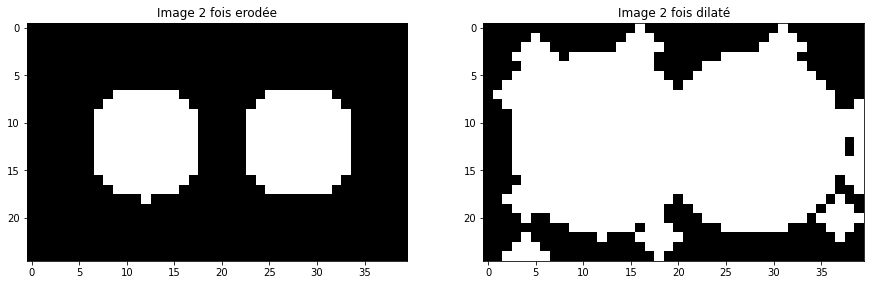

In [14]:
# Application 

fig, ax = plt.subplots(1,2,figsize = (15,5) )

ax[0].imshow(multi_erosion(circle_image,2,element), cmap='gray')

ax[0].set_title('Image 2 fois erodée')

ax[1].imshow(multi_dilatation(circle_image,2,element), cmap='gray')

ax[1].set_title('Image 2 fois dilaté')

Text(0.5, 1.0, 'Image 2 fois dilaté')

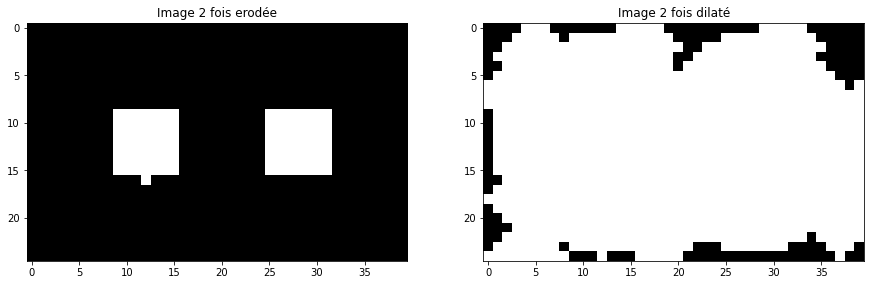

In [15]:
# Application 

fig, ax = plt.subplots(1,2,figsize = (15,5) )

ax[0].imshow(multi_erosion(circle_image,4,element), cmap='gray')

ax[0].set_title('Image 2 fois erodée')

ax[1].imshow(multi_dilatation(circle_image,4,element), cmap='gray')

ax[1].set_title('Image 2 fois dilaté')